# Exploration of Pattern Matrix Dataset(s)

In this notebook we explore the pattern matrix dataset as a whole and the training and testing sets derived from it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from context import km3net
from km3net.utils import DATADIR

In [2]:
COLNAMES = ['dx', 'dy', 'dz', 'dt', 'label']

df = pd.read_csv(DATADIR+'/train/pm/slice-mixed-10-equal-diff.csv',
    header=None, names=COLNAMES)
df

,dx,dy,dz,dt,label
0,19.313,106.411,-36.200,-507.0,1
1,113.513,0.920,38.120,-63305704.0,0
2,18.250,108.976,-27.500,-63432525.0,0
3,-10.308,-124.888,-0.118,-135.0,1
4,85.021,-54.076,-56.670,-15322796.0,0
...,...,...,...,...,...
72285,-29.709,91.196,-0.058,-69381717.0,0
72286,9.981,-88.915,-36.422,63297205.0,0
72287,-0.063,-72.500,-26.748,210.0,1
72288,-8.871,-17.449,-18.218,-56.0,1


In [4]:
# descriptive statistics
df.describe()

,dx,dy,dz,dt,label
count,72290.000000,72290.000000,72290.000000,7.229000e+04,72290.000000
mean,-1.456828,-2.175714,-0.886819,-7.175528e+04,0.500000
std,59.644546,73.566940,56.581203,3.521939e+07,0.500003
min,-190.571000,-218.676000,-158.880000,-7.877919e+07,0.000000
25%,-39.021750,-53.139500,-36.200000,-8.030000e+02,0.000000
50%,-0.144000,-0.250000,-0.052000,8.000000e+00,0.500000
75%,37.946750,38.801000,36.030000,7.537500e+02,1.000000
max,183.057000,220.325000,158.880000,7.877903e+07,1.000000


/Users/aru/code/km3net/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


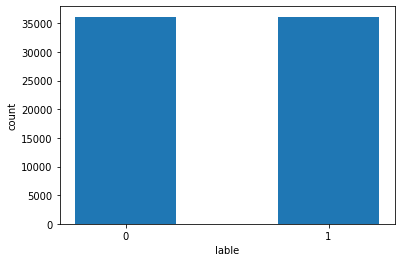

In [37]:
labels, counts = np.unique(df.label, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labels, counts, width=0.5, align='center')
ax.set_xticks(labels)
ax.set_xlabel('lable')
ax.set_ylabel('count')
fig.show()

In [30]:
related.head()

,dx,dy,dz,dt,label
0,19.313,106.411,-36.200,-507.0,1
3,-10.308,-124.888,-0.118,-135.0,1
6,9.645,-18.529,36.341,-123.0,1
9,-8.918,-19.154,9.622,-88.0,1
13,9.435,19.105,8.700,67.0,1


In [3]:
sample = df.sample(frac=0.05)
sample

,dx,dy,dz,dt,label
11542,104.428,-126.640,47.852,555.0,1
43787,67.799,17.404,65.480,10442.0,0
50271,-77.631,74.887,-47.380,128119.0,0
64669,86.037,-16.723,47.100,223.0,1
42704,17.763,-38.535,95.180,63441285.0,0
...,...,...,...,...,...
52841,114.974,-72.926,-36.200,-6075700.0,0
7561,-19.772,72.834,-18.100,-251.0,1
8351,30.708,53.731,27.272,-98.0,1
60916,-19.435,-37.494,0.031,120.0,1


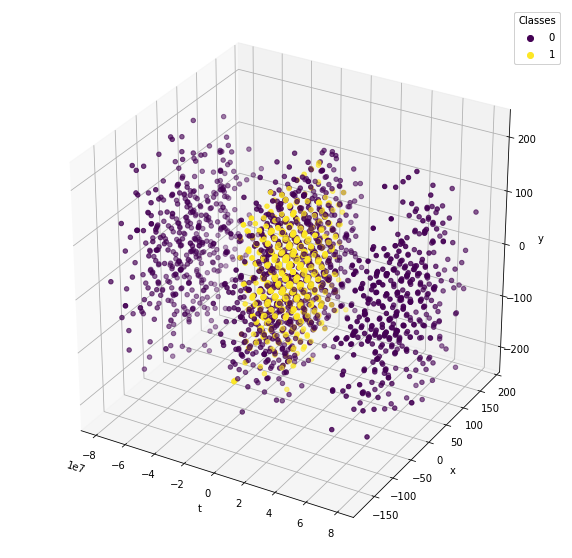

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sample.dt, sample.dx, sample.dy, marker='o', c=sample.label)
legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="best")
ax.add_artist(legend)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.savefig('./mlp-train-dist.png', dpi=200)